## Maximum Likelihood Lab

In this lab we will look at the DMV waiting time example from the class. Let's look at the following situation:

You want to find out how long your mom will have to wait at the DMV. In order to determine the waiting time you stayed at the DMV for a while and measured the waiting time for the customers. You were playing on your phone and so you missed to to measure the exact time. Thus you started to collect the waiting times in the form (5, 0.3), which in this example means that the waiting time was somewhere between 5-0.3 and 5+0.3 minutes. 

Now that you have your data you want to build a model. You now assume that all waiting times $W_i$ are distributed with the same **but unknown** gamma distribution with **fixed but unknown** hyperparameters $\alpha$ and $\beta$ and that all waiting times $W_i$ are independent and thus

$$P_{(\beta, \alpha)}(W_1 \in A_1, W_2 \in A_2, ..., W_N \in A_N) = \Gamma_{(\beta, \alpha)}(W_1 \in A_1)\Gamma_{(\beta, \alpha)}(W_2 \in A_2)... \Gamma_{(\beta, \alpha)}(W_N \in A_N)$$

Please take a moment and think about the 3 major assumptions:
1. The waiting times are independent.
2. All waiting times are distributed from the same type of distribution.
3. We are certain that the hyperparameters take one specific value. We just don't know which one it is. 

**Exercise 1:**

Create a lambda expression for the Gamma distribution. You will need the gamma function $\Gamma$ which is available in the scipy.special package. Plot the Gamma distribution for 4 different combinations of $\beta$ and $\alpha$ onto the same graph. Describe how the hyperparameters $\beta$ and $\alpha$ change the shape of the distribution.

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


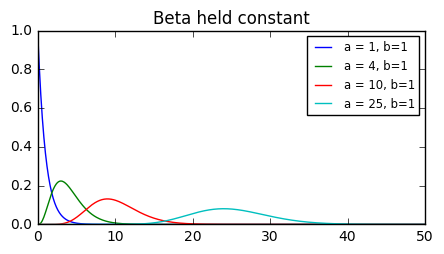

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
%matplotlib inline

#Gamma distribution
GD = lambda a,b : lambda x: (b**a)*(x**(a-1))*(np.exp(-x*b))/gamma(a)
X = np.arange(0,50,.1)
a = [1,4,10,25]
b = [1,1,1,1]
zipped = zip(a,b)
fig, ax = plt.subplots(1,1,figsize=(5,2.5))

#Plot alpha/beta curves
for e in zipped:
    ax.plot(X,GD(*e)(X), label = 'a = {0}, b={1}'.format(*e))
    ax.legend(loc = 'best', fontsize = 'small')
    ax.set_title("Beta held constant")
    
# A larger beta moves the curve closer to the y axis. When alpha equals 1, the line moves through the y-axis at 
# (0,beta). As alpha becomes much larger in comparison to beta, the curve flattens, widens, and moves
# further to the right along the x-axis.

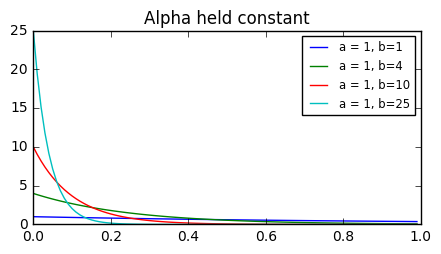

In [2]:
GD = lambda a,b : lambda x: (b**a)*(x**(a-1))*(np.exp(-x*b))/gamma(a)
X = np.arange(0,1,.01)
a = [1,1,1,1]
b = [1,4,10,25]
zipped = zip(a,b)
fig, ax = plt.subplots(1,1,figsize=(5,2.5))

#Plot alpha/beta curves
for e in zipped:
    ax.plot(X,GD(*e)(X), label = 'a = {0}, b={1}'.format(*e))
    ax.legend(loc = 'best', fontsize = 'small')
    ax.set_title("Alpha held constant")

**Exercise 2:**

The data points that you collected are in the below list denoted by waiting_time. Each of the tuples in the list represents an intervall of time that you measured. You can now use the below data points to calculate the probability of the measured intervalls as a function of $(\beta, \alpha)$

$$(\beta, \alpha) \to P_{(\beta, \alpha)}( W_1 \in [3.8,4.2), W_2 \in [3.5, 4.5), W_3 \in [4.1, 5.9), ...)$$

Create a lambda expression that maps every pair $(\beta, \alpha)$ onto the probability and create a 3D plot. You will need to use numpy.vectorize to vectorize the lambda expression. Numpy converts the lambda expression so that it can take numpy arrays as arguments. Look into last weeks notes to find out how to plot a 3D plot.

[(3.8, 4.2), (3.5, 4.5), (4.1, 5.9), (5.8, 6.2), (3.8, 4.2), (5.8, 6.2), (4.4, 5.6), (14.4, 15.6)]


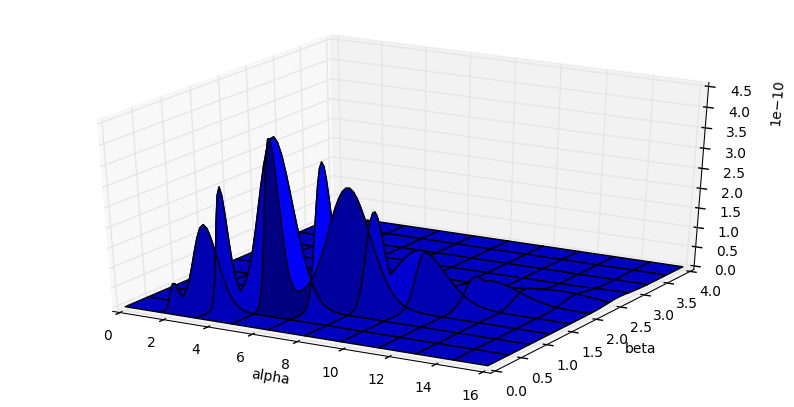

In [3]:
# Generate list of waiting time ranges (tuples)
waiting_time =[(4,0.2),(4,0.5), (5,0.9), (6,0.2), (4,0.2), (6,0.2), (5,0.6), (15,0.6)]
waiting_range = [(x[0]-x[1],x[0]+x[1]) for x in waiting_time]
print waiting_range

GD = lambda a,b : lambda x: (b**a)*(x**(a-1))*(np.exp(-x*b))/gamma(a)
# Mapping beta/alpha pairs onto probability distribution curve
betaGD = lambda a,b: np.prod([integrate.quad(lambda x: GD(a,b)(x), waiting_range[i][0],waiting_range[i][1])[0] \
                              for i in range(8)])

# Plot graph
b = np.linspace(0.01,4, 100)
a = np.linspace(0.01,16, 100)
b, a = np.meshgrid(b,a)
distvec = np.vectorize(betaGD)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1, projection = '3d')
ax1.plot_surface(a, b, distvec(a, b))
ax1.set_xlabel('alpha')
ax1.set_ylabel('beta')


**Exercise 3:**

Each of the points $(\beta, \alpha)$ represents a model that we could pick and the plot shows us how likely the measured waiting times are if we would have fixed $(\beta, \alpha)$ at the respective values. We now have to make a decision which pair $(\beta, \alpha)$ we want to pick. One way to approach this decision problem is to pick the $(\beta, \alpha)$ pair which produces the highest probability for the measured event. This approach is called **Maximum Likelihood**. 

Use the minimize function in the scipy.optimize package to find the maximum likelihood. You will have to change the function so that the maximum becomes the minimum. Additionally, minimize only takes functions of one variable. You will have to change your function so that it takes a list as an argument and not two numbers. Minimize looks for a minimum around an initial point x0. You will have to provide such a point. Use method = 'Nelder-Mead'. 

See below for an example of how to use minimize.

In [4]:
from scipy.optimize import minimize

# Flip betaGD function and use minimize function to find a/b pair that produces "highest" likelihood
inverse_betaGD = lambda x: -betaGD(x[0],x[1])  #Flip the betaGD graph so that max values are min values
x0 = [4,0.5]
funxMin = minimize(inverse_betaGD, x0, method = 'Nelder-Mead')
print 'Alpha: {}.'.format(funxMin.x[0])
print 'Beta: {}.'.format(funxMin.x[1])

Alpha: 4.95832989521.
Beta: 0.810427646774.


**Exercise 4:**

Now that we have our maximum likelihood solution we can take a step back and think about what we just did. 

* Take a look at the plot and remind yourself that minimize looks for a solution around an initial point x0. What's the problem with that?
* We assumed that the outcome that we measured is the outcome with the hightest probability. Take a look at the actual probability of getting what we measured under the assumption of the model. How likely was it? 
* Take a moment and check out what outliers are. How do those data points effect the solution in light of the above point and why?
* Can you think of a way to make a better decision?

**#4 Response**

1) The problem with looking for a solution around an initial point x0 is that the minimize function might only select the *relative* minimum as opposed to the absolute minimum.

2) By looking at our graph above, the probability density is approximately 2.75*10^-10. When calculating probability, below, we see that the probability of the outcome is about 15.9%.

3) In this example, our outlier is the one 15-minute waiting time. When we take away this data point from our set, the range of data in which our model needs to make a prediction is reduced (see Exercise 7 for more information).

4) First and foremost, obtaining more data points would help reduce the effect of outliers on our dataset. As it stands right now, 8 data points does not give us much significant insight into waiting times. For example, the 15 minute wait time currently is seen as an outlier, though it's possible that it would not be as uncommon with other wait times added to our dataset.

In [5]:
# Calculating probability using alpha and beta from Ex. 3.
alpha = funxMin.x[0]
beta = funxMin.x[1]

prob_4 = GD(alpha, beta)(funxMin.x)[0]
print prob_4


0.159055474561


**Exercise 5:**

Plot the distribution of the maximum likelihood solution together with a normed histogram of the waiting times. What can you observe and how does this relate to Exercise 4?

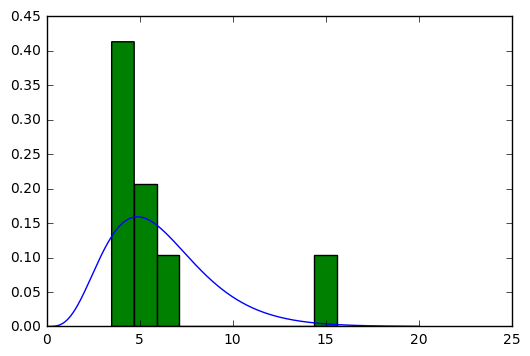

In [6]:
# Plot maximum likelihood curve and histogram of waiting times

X = np.arange(0,20.01, 0.01)
plt.plot(X, GD(alpha,beta)(X))

waiting_times = [waiting_range[i][ii] for i in range(8) for ii in range(2)]
plt.hist(waiting_times, normed=True);


*The graph above shows that the outlier has too much weight on the dataset, because the sample size is too small.*

**Exercise 6:**

Calculate the Mean and the Variance of the maximum likelihood distribution using integration. Remember: The Mean of the distribution $E[W]$ is the expected waiting time and the square root of the variance $\sqrt{Var[W]}$ is the expected range of waiting times.

In [7]:
# Calculating mean and variance through both integration and division of alpha and beta

mean = integrate.quad(lambda x: x * GD(alpha,beta)(x), 0, np.infty)[0]
print "Mean: {}".format(mean)

variance = integrate.quad(lambda x: x**2 * GD(alpha,beta)(x), 0, np.infty)[0] - mean**2
print "Variance: {}".format(variance)

mean_check = alpha/beta
print "Mean check: {}".format(mean_check)

variance_check = alpha/(beta**2)
print "Variance check: {}".format(variance_check)

Mean: 6.11816479232
Variance: 7.54930414415
Mean check: 6.11816479232
Variance check: 7.54930414415


**Exercise 7:**

Use the minimize function to calculate the waiting time with the hightest probability and its respective probability. Compare your result to the result of Exercise 6. Does this make you think about a better decision methodology for $(\beta, \alpha)$?

In [8]:
#Flip the betaGD graph so that max values are min values
inverse_GD = lambda x: -GD(alpha,beta)(x)
x0 = [5]
invGDmin = minimize(inverse_GD, x0, method = 'Nelder-Mead')

probability = GD(alpha, beta)(invGDmin.x)
print "The waiting time with highest probability is {0}, with a probability of {1}.".format(invGDmin.x[0], probability[0])

The waiting time with highest probability is 4.88427734375, with a probability of 0.159127186112.


**#7 Response**

Our results in Exercise 6 find that the mean is 1.23 minutes longer than than the waiting time of highest probability in Exercise 7. This is in large part attributed to the positive skew of the distribution created by the existence of the outlier in the dataset. If we remove that outlier, we get some more exciting results:

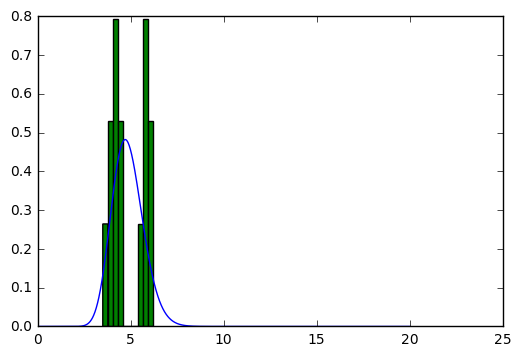

In [9]:
# Code below follows similar steps as above, removing the 15-minute wait time.
betaGD_nooutlier = lambda a,b: np.prod([integrate.quad(lambda x: GD(a,b)(x), waiting_range[i][0],waiting_range[i][1])[0] \
                              for i in range(7)]) #Updating the range to omit the final outlier in the list

inverse_betaGD_nooutlier = lambda x: -betaGD_nooutlier(x[0],x[1])
x0 = [4,0.5]
funxMin_o = minimize(inverse_betaGD_nooutlier, x0, method = 'Nelder-Mead')
a = funxMin_o.x[0]
b = funxMin_o.x[1]

X = np.arange(0,20.01, 0.01)
plt.plot(X, GD(a,b)(X))
waiting_times = [waiting_range[i][ii] for i in range(7) for ii in range(2)]
plt.hist(waiting_times, normed=True);

In [10]:
#Checking mean and variance...

mean = integrate.quad(lambda x: x * GD(a,b)(x), 0, np.infty)[0]
print "Mean: {}".format(mean)

variance = integrate.quad(lambda x: x**2 * GD(a,b)(x), 0, np.infty)[0] - mean**2
print "Variance: {}".format(variance)

Mean: 4.85135300942
Variance: 0.701554684731


As we can see above, by removing the outlier from our dataset, the mean moves much closer to the waiting time of highest probability. Additionally, the variance decreases *significantly*, suggesting that our dataset fits within a tighter range. 